In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk

plt.style.use('ggplot')

In [2]:
df = pd.read_excel("aritzia_reviews_v1.xlsx", sheet_name='Reviews')

In [3]:
df = df[:500]

In [4]:
df.columns

Index(['review_rating', 'title', 'review_text', 'username', 'product_name',
       'brand', 'link', 'category', 'price', 'scrape_date', 'review_date'],
      dtype='object')

<Axes: xlabel='review_rating'>

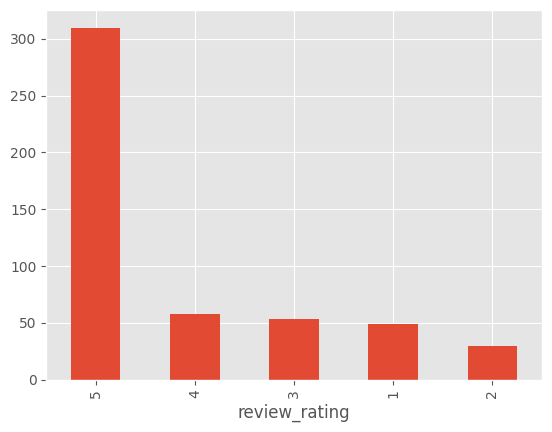

In [5]:
df['review_rating'].value_counts().plot(kind='bar')

In [6]:
example = df['review_text'][33]
example

'Quality of fabric is low. Prefer the other leggings that are more durable and look more flattering.'

In [7]:
tokens = nltk.word_tokenize(example)
tokens

['Quality',
 'of',
 'fabric',
 'is',
 'low',
 '.',
 'Prefer',
 'the',
 'other',
 'leggings',
 'that',
 'are',
 'more',
 'durable',
 'and',
 'look',
 'more',
 'flattering',
 '.']

In [8]:
tagged = nltk.pos_tag(tokens)
tagged

[('Quality', 'NN'),
 ('of', 'IN'),
 ('fabric', 'NN'),
 ('is', 'VBZ'),
 ('low', 'JJ'),
 ('.', '.'),
 ('Prefer', 'VB'),
 ('the', 'DT'),
 ('other', 'JJ'),
 ('leggings', 'NNS'),
 ('that', 'WDT'),
 ('are', 'VBP'),
 ('more', 'RBR'),
 ('durable', 'JJ'),
 ('and', 'CC'),
 ('look', 'VB'),
 ('more', 'JJR'),
 ('flattering', 'NN'),
 ('.', '.')]

In [9]:
entities = nltk.chunk.ne_chunk(tagged)
entities.pprint()

(S
  Quality/NN
  of/IN
  fabric/NN
  is/VBZ
  low/JJ
  ./.
  Prefer/VB
  the/DT
  other/JJ
  leggings/NNS
  that/WDT
  are/VBP
  more/RBR
  durable/JJ
  and/CC
  look/VB
  more/JJR
  flattering/NN
  ./.)


### VADER( Valence aware dictionary and sentiment reasoner)

- takes all words in sentence
- it has a value of positive, begative or nuetral for each of these words
- and combines all words value in the sentence and tells how positive, negative or nuetral the sentence
- it doesnt account for relation between words

In [10]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\iampr\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [11]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

In [12]:
sia = SentimentIntensityAnalyzer()

In [13]:
sia.polarity_scores("I'm so unhappy")

{'neg': 0.607, 'neu': 0.393, 'pos': 0.0, 'compound': -0.4754}

In [14]:
sia.polarity_scores(example)

{'neg': 0.107, 'neu': 0.762, 'pos': 0.132, 'compound': 0.1263}

In [15]:
df

,review_rating,title,review_text,username,product_name,brand,link,category,price,scrape_date,review_date
0,5,So good!,"Very form fitting, soft material. I recommend!",Lily C,BUTTER New Cheeky Flare Hi-Rise Legging,Golden,https://www.aritzia.com/us/en/product/butter-n...,activeWear,NaN,2025-02-06,2025-01-23
1,5,Fits nicely I went up a size because I don’t l...,Perfect they have the right amount of stretch ...,KIM C,BUTTER New Cheeky Flare Hi-Rise Legging,Golden,https://www.aritzia.com/us/en/product/butter-n...,activeWear,NaN,2025-02-06,2025-01-06
2,5,Love them,A tip I got in store was that the new sizing f...,Amanda M,BUTTER New Cheeky Flare Hi-Rise Legging,Golden,https://www.aritzia.com/us/en/product/butter-n...,activeWear,NaN,2025-02-06,2025-01-06
3,5,Super comfortable and so soft,Everything was amazing. I wish the pants game ...,simran G,BUTTER New Cheeky Flare Hi-Rise Legging,Golden,https://www.aritzia.com/us/en/product/butter-n...,activeWear,NaN,2025-02-06,2025-01-06
4,5,Great,Size 14 and fit a size 10,Jenesis V,BUTTER New Cheeky Flare Hi-Rise Legging,Golden,https://www.aritzia.com/us/en/product/butter-n...,activeWear,NaN,2025-02-06,2025-01-06
...,...,...,...,...,...,...,...,...,...,...,...
495,5,Perfect Bag,This bag is great for everything from everyday...,Kristie H,curator bigger bag,Babaton,https://www.aritzia.com/us/en/product/curator-...,accessory,NaN,2025-02-06,2024-04-06
496,5,Curator Bag is to die 4,Love!! Simple as that. You can dress it up and...,Trystan C,curator bigger bag,Babaton,https://www.aritzia.com/us/en/product/curator-...,accessory,NaN,2025-02-06,2024-03-06
497,5,Great everyday bag!,I've gotten so many compliments already! It's ...,Darine D,curator bigger bag,Babaton,https://www.aritzia.com/us/en/product/curator-...,accessory,NaN,2025-02-06,2024-03-06
498,5,Love it!!,Love everything about this bag!,Melissa G,curator bigger bag,Babaton,https://www.aritzia.com/us/en/product/curator-...,accessory,NaN,2025-02-06,2025-02-06


In [16]:
# Create a list to store results
res = []

# Iterate over the dataset
for index, row in tqdm(df.iterrows(), total=len(df)):
    review_text = row['review_text']
    score = sia.polarity_scores(review_text)
    
    # Convert row to dictionary and add sentiment scores
    row_dict = row.to_dict()  # Convert the row to a dictionary
    row_dict.update({
        'neg': score['neg'],
        'neu': score['neu'],
        'pos': score['pos'],
        'compound': score['compound']
    })
    
    res.append(row_dict)

# Convert results into a DataFrame
results_df = pd.DataFrame(res)

  0%|          | 0/500 [00:00<?, ?it/s]

In [17]:
results_df.head()

,review_rating,title,review_text,username,product_name,brand,link,category,price,scrape_date,review_date,neg,neu,pos,compound
0,5,So good!,"Very form fitting, soft material. I recommend!",Lily C,BUTTER New Cheeky Flare Hi-Rise Legging,Golden,https://www.aritzia.com/us/en/product/butter-n...,activeWear,NaN,2025-02-06,2025-01-23,0.000,0.642,0.358,0.4199
1,5,Fits nicely I went up a size because I don’t l...,Perfect they have the right amount of stretch ...,KIM C,BUTTER New Cheeky Flare Hi-Rise Legging,Golden,https://www.aritzia.com/us/en/product/butter-n...,activeWear,NaN,2025-02-06,2025-01-06,0.041,0.795,0.163,0.7530
2,5,Love them,A tip I got in store was that the new sizing f...,Amanda M,BUTTER New Cheeky Flare Hi-Rise Legging,Golden,https://www.aritzia.com/us/en/product/butter-n...,activeWear,NaN,2025-02-06,2025-01-06,0.053,0.540,0.407,0.9498
3,5,Super comfortable and so soft,Everything was amazing. I wish the pants game ...,simran G,BUTTER New Cheeky Flare Hi-Rise Legging,Golden,https://www.aritzia.com/us/en/product/butter-n...,activeWear,NaN,2025-02-06,2025-01-06,0.099,0.680,0.221,0.5574
4,5,Great,Size 14 and fit a size 10,Jenesis V,BUTTER New Cheeky Flare Hi-Rise Legging,Golden,https://www.aritzia.com/us/en/product/butter-n...,activeWear,NaN,2025-02-06,2025-01-06,0.000,0.667,0.333,0.3612


<Axes: xlabel='review_rating', ylabel='compound'>

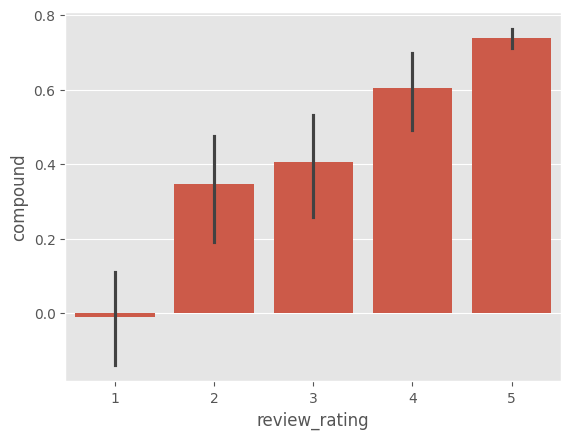

In [18]:
sns.barplot(data = results_df, x='review_rating', y='compound')

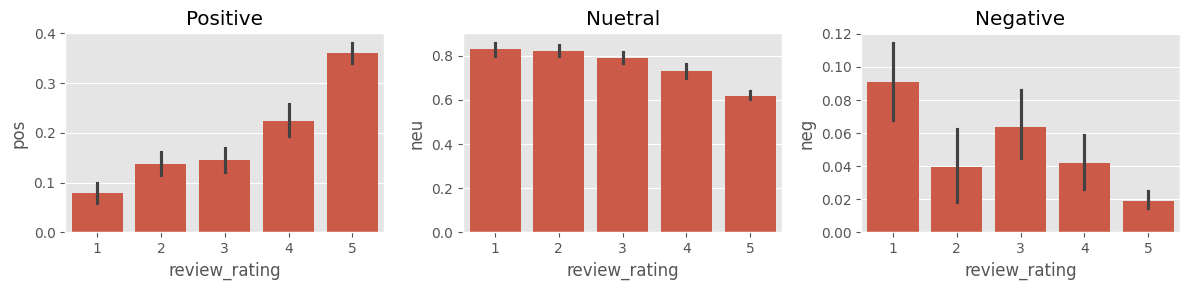

In [19]:
fig,axs = plt.subplots(1,3, figsize=(12,3))
sns.barplot(data = results_df, x='review_rating', y='pos', ax=axs[0])
sns.barplot(data = results_df, x='review_rating', y='neu', ax=axs[1])
sns.barplot(data = results_df, x='review_rating', y='neg', ax=axs[2])
axs[0].set_title('Positive')
axs[1].set_title('Nuetral')
axs[2].set_title('Negative')
plt.tight_layout()

### Roberta pretrainde model

- VADER takes each word seperately
- transformer models accounts for words including the context related to other words
- Like sentences could have negative words but written as sarcasm & actually its a positive sentence

In [20]:
!pip install transformers
!pip install torch --trusted-host pypi.org --trusted-host pypi.python.org --trusted-host=files.pythonhosted.org
!pip install tensorflow

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
apache-airflow 2.10.3 requires flask<2.3,>=2.2.1, but you have flask 3.0.3 which is incompatible.
apache-airflow 2.10.3 requires werkzeug<3,>=2.0, but you have werkzeug 3.0.6 which is incompatible.
apache-airflow-providers-fab 1.4.0 requires flask<2.3,>=2.2, but you have flask 3.0.3 which is incompatible.
tensorflow-intel 2.13.0 requires typing-extensions<4.6.0,>=3.6.6, but you have typing-extensions 4.12.2 which is incompatible.



  Using cached typing_extensions-4.12.2-py3-none-any.whl.metadata (3.0 kB)
Using cached typing_extensions-4.12.2-py3-none-any.whl (37 kB)
  Attempting uninstall: typing-extensions
    Found existing installation: typing_extensions 4.5.0
    Uninstalling typing_extensions-4.5.0:
      Successfully uninstalled typing_extensions-4.5.0
  Using cached typing_extensions-4.5.0-py3-none-any.whl.metadata (8.5 kB)
Using cached typing_extensions-4.5.0-py3-none-any.whl (27 kB)
  Attempting uninstall: typing-extensions
    Found existing installation: typing_extensions 4.12.2
    Uninstalling typing_extensions-4.12.2:
      Successfully uninstalled typing_extensions-4.12.2


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
apache-airflow 2.10.3 requires flask<2.3,>=2.2.1, but you have flask 3.0.3 which is incompatible.
apache-airflow 2.10.3 requires werkzeug<3,>=2.0, but you have werkzeug 3.0.6 which is incompatible.
apache-airflow-providers-fab 1.4.0 requires flask<2.3,>=2.2, but you have flask 3.0.3 which is incompatible.
graphene 3.4.3 requires typing-extensions<5,>=4.7.1, but you have typing-extensions 4.5.0 which is incompatible.
kombu 5.4.2 requires typing-extensions==4.12.2; python_version < "3.10", but you have typing-extensions 4.5.0 which is incompatible.
pydantic 2.9.2 requires typing-extensions>=4.6.1; python_version < "3.13", but you have typing-extensions 4.5.0 which is incompatible.
pydantic-core 2.23.4 requires typing-extensions!=4.7.0,>=4.6.0, but you have typing-extensions 4.5.0 which is incompatible.
selenium 4.27

In [21]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification
from scipy.special import softmax

In [22]:
#use pretrainer model
MODEL = f"cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)

pytorch_model.bin:   0%|          | 0.00/499M [00:00<?, ?B/s]

c:\Users\iampr\AppData\Local\Programs\Python\Python38\lib\site-packages\huggingface_hub\file_download.py:140: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\iampr\.cache\huggingface\hub\models--cardiffnlp--twitter-roberta-base-sentiment. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


model.safetensors:   0%|          | 0.00/499M [00:00<?, ?B/s]

In [ ]:
#vader
print(example)
sia.polarity_scores(example)

Quality of fabric is low. Prefer the other leggings that are more durable and look more flattering.


{'neg': 0.107, 'neu': 0.762, 'pos': 0.132, 'compound': 0.1263}

In [25]:
#roberta
encoded_text = tokenizer(example, return_tensors='pt')
output = model(**encoded_text)
scores = output[0][0].detach().numpy()
scores = softmax(scores)
scores_dict = {
    'robert_neg':scores[0],
    'robert_neu':scores[1],
    'robert_pos':scores[2],
}

scores_dict

{'robert_neg': 0.233379, 'robert_neu': 0.53080153, 'robert_pos': 0.23581943}

In [26]:
def polarity_scores_robert(example):
    encoded_text = tokenizer(example, return_tensors='pt')
    output = model(**encoded_text)
    scores = output[0][0].detach().numpy()
    scores = softmax(scores)
    scores_dict = {
        'robert_neg':scores[0],
        'robert_neu':scores[1],
        'robert_pos':scores[2],
    }

    return scores_dict

In [27]:
# Create a list to store results
res = []

# Iterate over the dataset
for index, row in tqdm(df.iterrows(), total=len(df)):
    review_text = row['review_text']
    
    # Get VADER sentiment scores
    score = sia.polarity_scores(review_text)
    
    # Get RoBERTa sentiment scores
    robert_scores = polarity_scores_robert(review_text)
    
    # Convert row to dictionary and add both VADER and RoBERTa sentiment scores
    row_dict = row.to_dict()  # Convert the row to a dictionary
    row_dict.update({
        'neg': score['neg'],
        'neu': score['neu'],
        'pos': score['pos'],
        'compound': score['compound'],
        **robert_scores  # Add RoBERTa scores to the row_dict
    })
    
    # Append the updated dictionary to the results list
    res.append(row_dict)

# Convert results into a DataFrame
results_df = pd.DataFrame(res)

  0%|          | 0/500 [00:00<?, ?it/s]

In [28]:
results_df

,review_rating,title,review_text,username,product_name,brand,link,category,price,scrape_date,review_date,neg,neu,pos,compound,robert_neg,robert_neu,robert_pos
0,5,So good!,"Very form fitting, soft material. I recommend!",Lily C,BUTTER New Cheeky Flare Hi-Rise Legging,Golden,https://www.aritzia.com/us/en/product/butter-n...,activeWear,NaN,2025-02-06,2025-01-23,0.000,0.642,0.358,0.4199,0.001492,0.024316,0.974192
1,5,Fits nicely I went up a size because I don’t l...,Perfect they have the right amount of stretch ...,KIM C,BUTTER New Cheeky Flare Hi-Rise Legging,Golden,https://www.aritzia.com/us/en/product/butter-n...,activeWear,NaN,2025-02-06,2025-01-06,0.041,0.795,0.163,0.7530,0.001485,0.011563,0.986952
2,5,Love them,A tip I got in store was that the new sizing f...,Amanda M,BUTTER New Cheeky Flare Hi-Rise Legging,Golden,https://www.aritzia.com/us/en/product/butter-n...,activeWear,NaN,2025-02-06,2025-01-06,0.053,0.540,0.407,0.9498,0.001805,0.008875,0.989321
3,5,Super comfortable and so soft,Everything was amazing. I wish the pants game ...,simran G,BUTTER New Cheeky Flare Hi-Rise Legging,Golden,https://www.aritzia.com/us/en/product/butter-n...,activeWear,NaN,2025-02-06,2025-01-06,0.099,0.680,0.221,0.5574,0.156650,0.260293,0.583056
4,5,Great,Size 14 and fit a size 10,Jenesis V,BUTTER New Cheeky Flare Hi-Rise Legging,Golden,https://www.aritzia.com/us/en/product/butter-n...,activeWear,NaN,2025-02-06,2025-01-06,0.000,0.667,0.333,0.3612,0.054819,0.802656,0.142526
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,5,Perfect Bag,This bag is great for everything from everyday...,Kristie H,curator bigger bag,Babaton,https://www.aritzia.com/us/en/product/curator-...,accessory,NaN,2025-02-06,2024-04-06,0.000,0.667,0.333,0.9699,0.001297,0.011105,0.987598
496,5,Curator Bag is to die 4,Love!! Simple as that. You can dress it up and...,Trystan C,curator bigger bag,Babaton,https://www.aritzia.com/us/en/product/curator-...,accessory,NaN,2025-02-06,2024-03-06,0.000,0.715,0.285,0.6988,0.009166,0.060483,0.930351
497,5,Great everyday bag!,I've gotten so many compliments already! It's ...,Darine D,curator bigger bag,Babaton,https://www.aritzia.com/us/en/product/curator-...,accessory,NaN,2025-02-06,2024-03-06,0.000,0.641,0.359,0.9163,0.001225,0.007612,0.991163
498,5,Love it!!,Love everything about this bag!,Melissa G,curator bigger bag,Babaton,https://www.aritzia.com/us/en/product/curator-...,accessory,NaN,2025-02-06,2025-02-06,0.000,0.471,0.529,0.6696,0.002963,0.011430,0.985607


In [31]:
from transformers import pipeline
sent_pipeline = pipeline('sentiment-analysis')

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

c:\Users\iampr\AppData\Local\Programs\Python\Python38\lib\site-packages\huggingface_hub\file_download.py:140: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\iampr\.cache\huggingface\hub\models--distilbert--distilbert-base-uncased-finetuned-sst-2-english. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

In [39]:
sent_pipeline("Its the best worst product")

[{'label': 'NEGATIVE', 'score': 0.9991377592086792}]

### Applying on df

In [42]:
sent_pipeline = pipeline('sentiment-analysis', device=-1)  # Use 'device=0' for GPU, 'device=-1' for CPU

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


In [43]:
df = pd.read_excel("aritzia_reviews_v1.xlsx", sheet_name='Reviews')

In [50]:
MAX_TOKENS = 512

# Function to process in batches and handle long reviews
def batch_sentiment_analysis(df, batch_size=64):
    sentiments = []
    for i in range(0, len(df), batch_size):
        batch = df['review_text'][i:i+batch_size].tolist()  # Convert Series to List of strings

        # Handle reviews that might exceed the token limit
        batch = [text[:MAX_TOKENS] for text in batch]  # Truncate to MAX_TOKENS length
        
        batch_sentiments = sent_pipeline(batch)
        sentiments.extend([result['label'] for result in batch_sentiments])
    
    return sentiments

In [51]:
# Apply batch sentiment analysis to the entire dataset
df['sentimental_analysis'] = batch_sentiment_analysis(df)

KeyboardInterrupt: 